In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housedata/HousingData.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

1. IMPORT DATA 
2. DF.INFO()
3. DF.CORR() OF ALL INDEPENDENT VARIABLES WITH TARGET VARIABLE WHICH IS MEDV

In [34]:
df = pd.read_csv('/kaggle/input/housedata/HousingData.csv')
df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6


In [35]:
df  = df.dropna()

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 394 entries, 0 to 504
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     394 non-null    float64
 1   ZN       394 non-null    float64
 2   INDUS    394 non-null    float64
 3   CHAS     394 non-null    float64
 4   NOX      394 non-null    float64
 5   RM       394 non-null    float64
 6   AGE      394 non-null    float64
 7   DIS      394 non-null    float64
 8   RAD      394 non-null    int64  
 9   TAX      394 non-null    int64  
 10  PTRATIO  394 non-null    float64
 11  B        394 non-null    float64
 12  LSTAT    394 non-null    float64
 13  MEDV     394 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 46.2 KB


In [37]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,3.690136,11.460660,11.000863,0.068528,0.553215,6.280015,68.932741,3.805268,9.403553,406.431472,18.537563,358.490939,12.769112,22.359645
std,9.202423,23.954082,6.908364,0.252971,0.113112,0.697985,27.888705,2.098571,8.633451,168.312419,2.166460,89.283295,7.308430,9.142979
min,0.006320,0.000000,0.460000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,2.600000,1.730000,5.000000
25%,0.081955,0.000000,5.130000,0.000000,0.453000,5.879250,45.475000,2.110100,4.000000,280.250000,17.400000,376.707500,7.125000,16.800000
50%,0.268880,0.000000,8.560000,0.000000,0.538000,6.201500,77.700000,3.199200,5.000000,330.000000,19.100000,392.190000,11.300000,21.050000
75%,3.435973,12.500000,18.100000,0.000000,0.624000,6.605500,94.250000,5.116700,24.000000,666.000000,20.200000,396.900000,17.117500,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [38]:
df.corr()["MEDV"].sort_values()

LSTAT     -0.743450
PTRATIO   -0.543809
INDUS     -0.510829
TAX       -0.508864
NOX       -0.459054
RAD       -0.416638
AGE       -0.407470
CRIM      -0.397230
CHAS       0.173701
DIS        0.279547
B          0.347256
ZN         0.406822
RM         0.723951
MEDV       1.000000
Name: MEDV, dtype: float64

### Dataset creation

In [95]:
X = df.loc[:,['LSTAT','PTRATIO','RM','ZN','INDUS','TAX']]
Y = df.loc[:,"MEDV"]

In [96]:
from sklearn.model_selection import train_test_split
X_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=10)

In [97]:
X_train.shape,x_test.shape

((295, 6), (99, 6))

In [98]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
x_train = scaler.transform(X_train)
x_test = scaler.transform(x_test)

### Prepare model

In [99]:
from keras.models import Sequential
from keras.layers import Dense

In [100]:
model = Sequential()

In [101]:
x_train.shape

(295, 6)

input_shape = (3,) means input feature vecto has 3 features

In [102]:
model.add(Dense(258,input_dim = 6,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='linear'))
model.compile(optimizer='adam',loss='mse',metrics=['mae'])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [103]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 258)            │         1,806 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 64)             │        16,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,447 (72.06 KB)

 Trainable params: 18,447 (72.06 KB)

 Non-trainable params: 0 (0.00 B)

In [105]:
history = model.fit(x_train,y_train,epochs=200,validation_split=0.05)

Epoch 1/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 12.1650 - mae: 2.4506 - val_loss: 16.0424 - val_mae: 3.0096
Epoch 2/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 11.9117 - mae: 2.3468 - val_loss: 16.3806 - val_mae: 3.0306
Epoch 3/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 16.5839 - mae: 2.6779 - val_loss: 16.6513 - val_mae: 3.0684
Epoch 4/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 12.8023 - mae: 2.5766 - val_loss: 15.9107 - val_mae: 3.0059
Epoch 5/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 14.7739 - mae: 2.5488 - val_loss: 16.6750 - val_mae: 3.1106
Epoch 6/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 14.0629 - mae: 2.4384 - val_loss: 16.3880 - val_mae: 3.0770
Epoch 7/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 13.5488 - mae: 2.5961 - val_loss: 15.7220 - val_mae: 2.9692
Epoch 8/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 12.5796 - mae: 2.4409 - val_loss: 17.3680 - val_mae: 3.1834
Epoch 9/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 11.528

### Loss vs Validation Loss

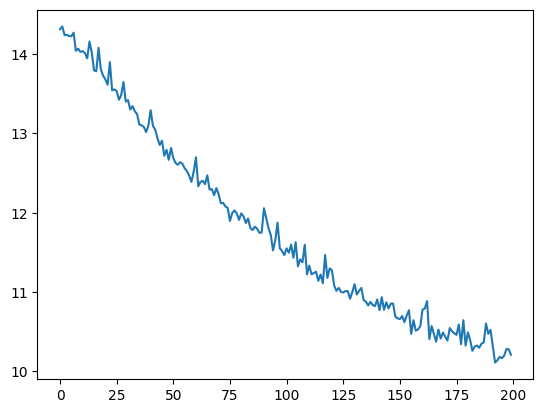

In [108]:
plt.plot(history.history['loss']);

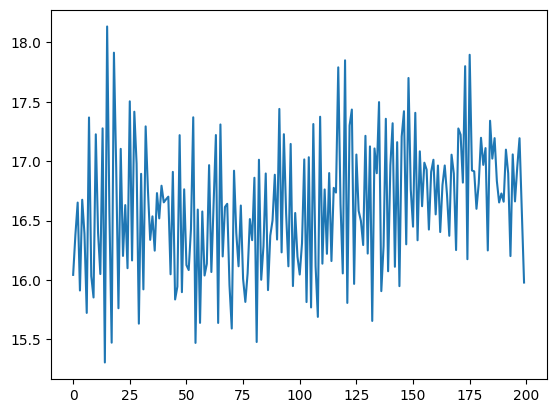

In [109]:
plt.plot(history.history['val_loss']);

In [76]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

### Results

In [110]:
y_pred = model.predict(x_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [115]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)

# Calculate R^2 Score
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

Mean Squared Error: 8.358055359890951
Mean Absolute Error: 2.1372836681327434
Root Mean Squared Error: 2.891030155479349
R-squared: 0.8434471538907259
